<a href="https://colab.research.google.com/github/Maede27/Image-Classification-with-CNN/blob/master/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q tensorflow tensorflow-datasets

## Import required libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## List of the  available datasets in Tensorflow

In [3]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

## smallnorb dataset will be selected

In [4]:
build = tfds.builder('smallnorb')
detail = build.info
detail

tfds.core.DatasetInfo(
    name='smallnorb',
    version=2.0.0,
    description='\
This database is intended for experiments in 3D object recognition from shape. It contains images of 50 toys belonging to 5 generic categories: four-legged animals, human figures, airplanes, trucks, and cars. The objects were imaged by two cameras under 6 lighting conditions, 9 elevations (30 to 70 degrees every 5 degrees), and 18 azimuths (0 to 340 every 20 degrees).

The training set is composed of 5 instances of each category (instances 4, 6, 7, 8 and 9), and the test set of the remaining 5 instances (instances 0, 1, 2, 3, and 5).
',
    homepage='https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/',
    features=FeaturesDict({
        'image': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'image2': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'instance': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
        'label_azimuth': ClassLabel(shape=(), dtype=tf.int64, num_classes=18),
        '

## Train-Test Split

In [5]:
data_train = tfds.load(name="smallnorb", split="train")
data_test = tfds.load(name="smallnorb", split="test")
# validation_test = tfds.load(name="smallnorb", split="validation")

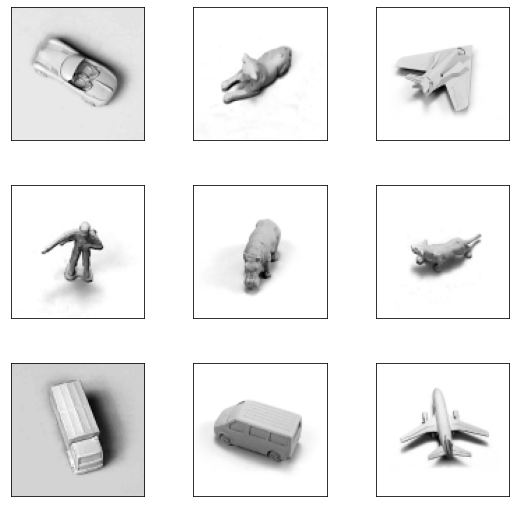

In [6]:
fig = tfds.show_examples(detail, data_train, image_key= 'image')

In [7]:
image_training = [example['image'] for example in data_train]

In [8]:
type(image_training[0])

tensorflow.python.framework.ops.EagerTensor

## Change the format of images to numpy array


In [9]:
image_training = np.array([example['image'].numpy()[:,:,0] for example in data_train])
label_training = np.array([example['label_category'].numpy() for example in data_train])

image_test = np.array([example['image'].numpy()[:,:,0] for example in data_test])
label_test = np.array([example['label_category'].numpy() for example in data_test])

In [10]:
type(image_training[0])

numpy.ndarray

In [11]:
image_training = image_training.reshape(24300, 96, 96 , 1)
image_test = image_test.reshape(24300, 96, 96, 1)

image_training = image_training.astype('float32')
image_test = image_test.astype('float32')

image_training /= 255
image_test /= 255

## Train a neural network

In [12]:
NN = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(5, activation='softmax') 
])

NN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

NN.fit(image_training, label_training, epochs=5, batch_size=32)

Epoch 1/5
760/760 [==============================] - 23s 30ms/step - loss: 1.3313 - accuracy: 0.4919
Epoch 2/5
760/760 [==============================] - 23s 30ms/step - loss: 0.8499 - accuracy: 0.6405
Epoch 3/5
760/760 [==============================] - 23s 30ms/step - loss: 0.7462 - accuracy: 0.6860
Epoch 4/5
760/760 [==============================] - 23s 30ms/step - loss: 0.6857 - accuracy: 0.7207
Epoch 5/5
760/760 [==============================] - 23s 30ms/step - loss: 0.5794 - accuracy: 0.7701


In [13]:
NN.evaluate(image_test, label_test)

760/760 [==============================] - 8s 10ms/step - loss: 0.9145 - accuracy: 0.6387


[0.9144730567932129, 0.6387242674827576]

## Train a Convolutional Neural Network

In [14]:
CNN = keras.Sequential([
   keras.layers.AveragePooling2D(6,5, input_shape=(96,96,1)),
   keras.layers.Conv2D(64, 5, activation='relu'),
   keras.layers.Conv2D(32, 5, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(5, activation='softmax')
])

CNN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

CNN.fit(image_training, label_training, epochs=5, batch_size=32)

Epoch 1/5
760/760 [==============================] - 48s 63ms/step - loss: 0.7817 - accuracy: 0.6768
Epoch 2/5
760/760 [==============================] - 48s 63ms/step - loss: 0.3685 - accuracy: 0.8581
Epoch 3/5
760/760 [==============================] - 48s 63ms/step - loss: 0.2638 - accuracy: 0.8995
Epoch 4/5
760/760 [==============================] - 48s 63ms/step - loss: 0.2090 - accuracy: 0.9215
Epoch 5/5
760/760 [==============================] - 48s 63ms/step - loss: 0.1749 - accuracy: 0.9345


In [15]:
CNN.evaluate(image_test,label_test)

760/760 [==============================] - 15s 20ms/step - loss: 0.5640 - accuracy: 0.8132


[0.5639890432357788, 0.8132098913192749]

## Tune hyperparameters

In [20]:
pip install -q -U keras-tuner

In [41]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  CNN = keras.Sequential()

  CNN.add(keras.layers.AveragePooling2D(6,5,input_shape=(96,96,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    CNN.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  CNN.add(keras.layers.MaxPool2D(2,2))
  CNN.add(keras.layers.Dropout(0.5))
  CNN.add(keras.layers.Flatten())

  CNN.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  CNN.add(keras.layers.Dense(5, activation='softmax'))

  CNN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return CNN

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(image_training, label_training, validation_data=(image_test, label_test), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


Epoch 1/10
760/760 [==============================] - 60s 79ms/step - loss: 0.5861 - accuracy: 0.7641 - val_loss: 0.4720 - val_accuracy: 0.8194
Epoch 2/10
760/760 [==============================] - 59s 78ms/step - loss: 0.1626 - accuracy: 0.9423 - val_loss: 0.6781 - val_accuracy: 0.8008
Epoch 3/10
760/760 [==============================] - 61s 80ms/step - loss: 0.0939 - accuracy: 0.9675 - val_loss: 0.5356 - val_accuracy: 0.8624
Epoch 4/10
760/760 [==============================] - 60s 78ms/step - loss: 0.0670 - accuracy: 0.9774 - val_loss: 0.6272 - val_accuracy: 0.8345
Epoch 5/10
760/760 [==============================] - 59s 78ms/step - loss: 0.0481 - accuracy: 0.9827 - val_loss: 0.7109 - val_accuracy: 0.8396
Epoch 6/10
760/760 [==============================] - 60s 79ms/step - loss: 0.0412 - accuracy: 0.9856 - val_loss: 0.9372 - val_accuracy: 0.8214
Epoch 7/10
760/760 [==============================] - 60s 78ms/step - loss: 0.0343 - accuracy: 0.9876 - val_loss: 0.7269 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 60s 79ms/step - loss: 0.7557 - accuracy: 0.6876 - val_loss: 0.5694 - val_accuracy: 0.7830
Epoch 2/10
760/760 [==============================] - 60s 79ms/step - loss: 0.3038 - accuracy: 0.8859 - val_loss: 0.4803 - val_accuracy: 0.8319
Epoch 3/10
760/760 [==============================] - 61s 80ms/step - loss: 0.1936 - accuracy: 0.9289 - val_loss: 0.5662 - val_accuracy: 0.8299
Epoch 4/10
760/760 [==============================] - 60s 78ms/step - loss: 0.1455 - accuracy: 0.9474 - val_loss: 0.5545 - val_accuracy: 0.8419
Epoch 5/10
760/760 [==============================] - 59s 78ms/step - loss: 0.1145 - accuracy: 0.9586 - val_loss: 0.6784 - val_accuracy: 0.8186
Epoch 6/10
760/760 [==============================] - 59s 78ms/step - loss: 0.0954 - accuracy: 0.9653 - val_loss: 0.7561 - val_accuracy: 0.8209
Epoch 7/10
760/760 [==============================] - 59s 78ms/step - loss: 0.0862 - accuracy: 0.9687 - val_loss: 0.7348 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 60s 79ms/step - loss: 0.5076 - accuracy: 0.7982 - val_loss: 0.5654 - val_accuracy: 0.8127
Epoch 2/10
760/760 [==============================] - 60s 79ms/step - loss: 0.1371 - accuracy: 0.9479 - val_loss: 0.5845 - val_accuracy: 0.8416
Epoch 3/10
760/760 [==============================] - 61s 80ms/step - loss: 0.0667 - accuracy: 0.9767 - val_loss: 0.7023 - val_accuracy: 0.8524
Epoch 4/10
760/760 [==============================] - 60s 79ms/step - loss: 0.0460 - accuracy: 0.9837 - val_loss: 0.7543 - val_accuracy: 0.8485
Epoch 5/10
760/760 [==============================] - 60s 79ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.8910 - val_accuracy: 0.8372
Epoch 6/10
760/760 [==============================] - 60s 78ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 1.1087 - val_accuracy: 0.8016
Epoch 7/10
760/760 [==============================] - 59s 78ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.9358 - val_accuracy:

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [28]:
best_fit = tuner.get_best_models()[0]
best_fit.evaluate(image_test, label_test)

760/760 [==============================] - 10s 13ms/step - loss: 0.3491 - accuracy: 0.8969


[0.34909746050834656, 0.8968724012374878]

## Summary of the best model for our image dataset

In [29]:
best_fit.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 19, 19, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 17, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [36]:
# The target results for one image example
res = best_fit.predict(np.array([image_training[0]]))
res

array([[6.9743127e-02, 4.1872212e-03, 2.9028398e-01, 4.4856136e-04,
        6.3533717e-01]], dtype=float32)

## Save the best convolutional neural network

In [39]:
best_fit.save('./best_fit')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: ./best_fit/assets


INFO:tensorflow:Assets written to: ./best_fit/assets


In [40]:
load_CNN= keras.models.load_model('./best_fit')